# Week 11 Lab Classification on default and Smarket datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_default = pd.read_csv('Default.csv')

In [3]:
df_default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [4]:
df_default['default0'] = df_default['default'].factorize()[0]

In [6]:
df_default.head()

,Unnamed: 0,default,student,balance,income,default0
0,1,No,No,729.526495,44361.62507,0
1,2,No,Yes,817.180407,12106.13470,0
2,3,No,No,1073.549164,31767.13895,0
3,4,No,No,529.250605,35704.49394,0
4,5,No,No,785.655883,38463.49588,0


## Exercise 1 How many data are default positive and negative?

In [13]:
list_default = list(df_default["default"].values)
#list_default

In [ ]:
list_default.unique()

In [14]:
list_default.count('No')

9667

In [16]:
list_default.count('Yes')

333

In [17]:
set(list_default)

{'No', 'Yes'}

## Split the data into training and test subsets

In [47]:
from sklearn.model_selection import train_test_split

x_data = df_default['balance'].values.reshape(-1,1)
y_data = df_default['default0'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=23)

In [48]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

In [49]:
model1.fit(x_train, y_train)

/Users/katarinaspackova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(model1.predict(x_train),y_train) #training accuracy

0.9725714285714285

In [52]:
accuracy_score(model1.predict(x_test),y_test) #test accuracy

0.9716666666666667

## Ex2. Comparing the predictions against the truth: true positive, true negative, false positive, false negatiave

In [59]:
pred_test = model1.predict(x_test)
compare_test = []

for i in range(len(pred_test)):
    
    t = y_test[i]
    p = pred_test[i]
    
    if t*p == 1:
        compare_test.append("TP")
    elif t*p == 0:
        compare_test.append("TN")
    elif p == 1:
        compare_test.append("FP")
    else:
        compare_test.append("FN")   



In [60]:
compare_test.count('TP')

31

In [61]:
compare_test.count('TN')

2969

In [62]:
compare_test.count('FP')

0

In [63]:
compare_test.count('FN')

0

In [64]:
len(compare_test)

3000

In [76]:
def report_accuracy(compare_test):
    return (compare_test.count('TP')+compare_test.count('TN'))/len(compare_test)

In [78]:
report_accuracy(compare_test)

1.0

In [83]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [44]:
print(confusion_matrix(y_test, pred_test))

[[2884   16]
 [  69   31]]


In [86]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2900
           1       0.66      0.31      0.42       100

    accuracy                           0.97      3000
   macro avg       0.82      0.65      0.70      3000
weighted avg       0.97      0.97      0.97      3000



In [87]:
# TP/(TP+FN)

31/(31+69)

0.31

In [88]:
# TP/(TP+FP)

31/(31+16)

0.6595744680851063

In [48]:
# TN/(TN+FP)

2884/(2884+16)

0.9944827586206897

In [49]:
# TN/(TN+FN)

2884/(2884+69)

0.9766339315949881

## LDA

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [90]:
model2 = LinearDiscriminantAnalysis()

In [91]:
model2.fit(x_train, y_train)

/Users/katarinaspackova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [92]:
pred_test = model2.predict(x_test)

In [93]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2900
           1       0.71      0.22      0.34       100

    accuracy                           0.97      3000
   macro avg       0.84      0.61      0.66      3000
weighted avg       0.96      0.97      0.96      3000



## Ex3. Breaking down the number of TP, TN, FP, and FN in the test prediction

In [62]:
model2.means_

array([[ 800.4496797 ],
       [1744.60639557]])

In [64]:
model2.priors_

array([0.96671429, 0.03328571])

In [66]:
model2.scalings_

array([[0.00221212]])

## QDA

In [55]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [56]:
model3 = QuadraticDiscriminantAnalysis()

In [57]:
model3.fit(x_train, y_train)

/Users/felix/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


QuadraticDiscriminantAnalysis()

In [58]:
pred_test = model3.predict(x_test)

In [59]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2900
           1       0.74      0.28      0.41       100

    accuracy                           0.97      3000
   macro avg       0.86      0.64      0.70      3000
weighted avg       0.97      0.97      0.97      3000



In [60]:
model3.get_params(deep=True)

{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}

In [67]:
model3.means_

array([[ 800.4496797 ],
       [1744.60639557]])

In [68]:
model3.priors_

array([0.96671429, 0.03328571])

In [69]:
model3.scalings_

[array([207293.60733296]), array([118636.405108])]

## Verifying these model parameters

In [109]:
balance_0 = []
balance_1 = []
for balance, default in zip(x_train, y_train):
    if default == 0:
        balance_0.append(balance)
    else:
        balance_1.append(balance)




In [73]:
np.mean(balance_0)

800.4496797022787

In [74]:
np.var(balance_0)

207262.97431872596

In [76]:
np.mean(balance_1)

1744.606395574249

In [77]:
np.var(balance_1)

118127.23598736682

In [79]:
len(balance_0)/len(x_train)

0.9667142857142857

In [80]:
len(balance_1)/len(x_train)

0.03328571428571429

## Visualization

In [7]:
balance_default = df_default.loc[df_default['default0'].values==1].balance.values
balance_nondefault = df_default.loc[df_default['default0'].values==0].balance.values

<AxesSubplot:ylabel='Count'>

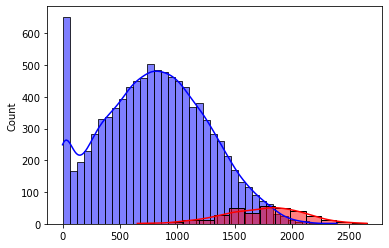

In [8]:
import seaborn as sns

sns.histplot(balance_nondefault, kde=True, color='b')
sns.histplot(balance_default, kde=True,color='r')